# MolGrid Demo - Jupyter Notebook

This notebook demonstrates the MolGrid interactive molecule grid visualization component.

MolGrid provides an interactive grid for browsing, searching, and selecting molecules with features including:

- Pagination for large datasets
- Text search by molecular properties
- SMARTS substructure filtering
- Selection with export to SMILES/CSV
- Info tooltips with molecular data
- Full DataFrame integration

## Table of Contents

- [Setup](#Setup)
- [Basic Usage](#Basic-Usage)
  - [Creating a Simple Grid from Molecules](#Creating-a-Simple-Grid-from-Molecules)
- [Customizing the Display](#Customizing-the-Display)
  - [Image Size and Format](#Image-Size-and-Format)
- [Search and Filtering](#Search-and-Filtering)
- [Selection](#Selection)
  - [Enabling Selection](#Enabling-Selection)
  - [Retrieving Selected Molecules](#Retrieving-Selected-Molecules)
  - [Selection Actions Menu](#Selection-Actions-Menu)
- [Info Button and Tooltips](#Info-Button-and-Tooltips)
  - [Disabling the Info Button](#Disabling-the-Info-Button)
- [DataFrame Integration](#DataFrame-Integration)
  - [Creating a Grid from a DataFrame](#Creating-a-Grid-from-a-DataFrame)
  - [Auto-Detection of Search Fields](#Auto-Detection-of-Search-Fields)
  - [Specifying Data Fields](#Specifying-Data-Fields)
- [API Reference](#API-Reference)
  - [MolGrid Parameters](#MolGrid-Parameters)
  - [MolGrid Methods](#MolGrid-Methods)

## Setup

First, import the required packages.

In [1]:
import cnotebook
from cnotebook import MolGrid, molgrid
from openeye import oechem, oeiupac, oemolprop
import pandas as pd
import oepandas as oepd

## Basic Usage

### Creating a Simple Grid from Molecules

The simplest way to use MolGrid is to pass a list of OpenEye molecule objects. Note that you can use the class ```MolGrid``` or the function ```molgrid``` and achieve the exact same results. We'll switch it up for fun in this notebook.

In [2]:
# Create some test molecules
smiles_data = [
    ("CCO", "Ethanol"),
    ("CC(=O)O", "Acetic Acid"),
    ("c1ccccc1", "Benzene"),
    ("CC(=O)Nc1ccc(O)cc1", "Acetaminophen"),
    ("CC(C)Cc1ccc(C(C)C(=O)O)cc1", "Ibuprofen"),
    ("CN1C=NC2=C1C(=O)N(C(=O)N2C)C", "Caffeine"),
    ("CC(=O)OC1=CC=CC=C1C(=O)O", "Aspirin"),
    ("CN1CCC[C@H]1c2cccnc2", "Nicotine"),
]

molecules = []
for smi, name in smiles_data:
    mol = oechem.OEGraphMol()
    oechem.OESmilesToMol(mol, smi)
    mol.SetTitle(name)
    molecules.append(mol)

# Create and display a basic grid
grid = MolGrid(molecules)
grid.display()

## Customizing the Display

### Image Size and Format

Customize the molecule image dimensions and format.

In [3]:
grid = MolGrid(
    molecules,
    width=150,
    height=150,
    n_items_per_page=8,
    title=False,
    image_format="svg"  # or "png"
)
grid.display()

## Search and Filtering

MolGrid provides two search modes:

1. **Properties Mode**: Text search across molecule titles and properties
2. **SMARTS Mode**: Substructure filtering using SMARTS patterns

Use the toggle switch in the toolbar to switch between modes.

Try searching for:
- Properties mode: ``acid`` or ``caffeine``
- SMARTS mode: ``c1ccccc1`` (benzene ring) or ``[OH]`` (hydroxyl group)

In [4]:
grid = MolGrid(molecules, n_items_per_page=8)
grid.display()

## Selection

### Enabling Selection

Selection is enabled by default. Click on molecules or use the checkbox to select them.

<div class="alert alert-block alert-info">
<b>NOTE:</b> The grid does not save state between notebook executions. You'll lose your previous selections and filtering state when the notebook is restarted. Remember to save them! It is possible that this will be enabled in a future update.
</div>

In [5]:
grid = MolGrid(molecules, select=True)
grid.display()

### Retrieving Selected Molecules

After making selections in the grid above, run the cell below to retrieve the selected molecules.

In [6]:
# Get selected molecule objects
selected_mols = grid.get_selection()
print(f"Selected {len(selected_mols)} molecules:")
for mol in selected_mols:
    print(f"  - {mol.GetTitle()}")

# Get selected indices
indices = grid.get_selection_indices()
print(f"\nSelected indices: {indices}")

Selected 0 molecules:

Selected indices: []


### Selection Actions Menu

The "..." menu in the toolbar provides selection actions:

- **Select All**: Select all visible (filtered) molecules
- **Clear Selection**: Deselect all molecules
- **Invert Selection**: Toggle selection state of all visible molecules
- **Copy to Clipboard**: Copy selected molecules as CSV
- **Save to SMILES**: Download selected molecules as a .smi file
- **Save to CSV**: Download selected molecules as a .csv file

## Info Button and Tooltips

Each molecule cell has an info button ("i") in the top-right corner that displays molecular data.

- **Hover** over the "i" to see the tooltip
- **Click** the "i" to pin the tooltip open (useful for comparing molecules)
- **Click again** to unpin

The info button shows:
- Index (always)
- Title (if available)
- Any columns specified via the `data` parameter

In [7]:
# Add SD data to molecules for display in tooltips
for mol in molecules:
    oechem.OESetSDData(mol, "MW", str(oechem.OECalculateMolecularWeight(mol)))
    oechem.OESetSDData(mol, "Formula", oechem.OEMolecularFormula(mol))

# Display specific data fields in the info tooltip
grid = MolGrid(molecules, data=["MW", "Formula"])
grid.display()

### Disabling the Info Button

Set `information=False` to hide the info button.

In [8]:
grid = MolGrid(molecules, information=False)
grid.display()

## DataFrame Integration

MolGrid integrates seamlessly with Pandas DataFrames containing molecule columns.

### Creating a Grid from a DataFrame

,Molecule,Name,MW,HBA,HBD
0,,ethanol,46.06844,1,1
1,,benzene,78.11184,0,0
2,,~{N}-(4-hydroxyphenyl)acetamide,151.16255999999998,1,2
3,,2-(4-isobutylphenyl)propanoic acid,206.28082,1,1
4,,"1,3,7-trimethylpurine-2,6-dione",194.1906,2,0
5,,2-acetoxybenzoic acid,180.15742000000003,2,1

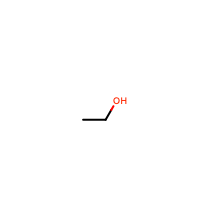
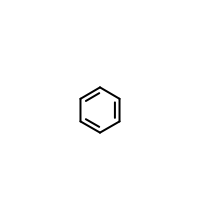
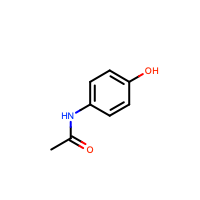
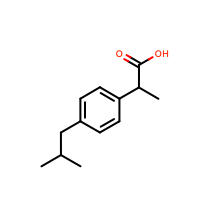
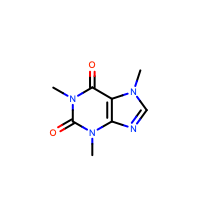
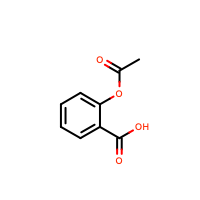

In [9]:
# Create a DataFrame with SMILES
# Conver the SMILES to OpenEye molecules
df = pd.DataFrame({
    "Molecule": [
        "CCO", "c1ccccc1", "CC(=O)Nc1ccc(O)cc1", 
        "CC(C)Cc1ccc(C(C)C(=O)O)cc1", "CN1C=NC2=C1C(=O)N(C(=O)N2C)C",
        "CC(=O)OC1=CC=CC=C1C(=O)O"]
}).chem.as_molecule("Molecule")

# Add properties
df["Name"] = df.Molecule.apply(oeiupac.OECreateIUPACName)
df["MW"] = df.Molecule.apply(oechem.OECalculateMolecularWeight)
df["HBA"] = df.Molecule.apply(oemolprop.OEGetHBondAcceptorCount)
df["HBD"] = df.Molecule.apply(oemolprop.OEGetHBondDonorCount)

# Display the DataFrame
df

In [10]:
# Create grid from DataFrame
grid = df.chem.molgrid("Molecule", title="Name")
grid.display()

### Auto-Detection of Search Fields

When using a DataFrame, MolGrid automatically detects string columns for text search. You can see from the above example that only ``Name`` is included in the text search, but all the properties from the original ``DataFrame`` are included in the information fields.

In [11]:
# The Name and Category columns are automatically searchable
print(f"Search fields: {grid.search_fields}")
print(f"Info fields: {grid.information_fields}")

Search fields: ['Name']
Info fields: ['Name', 'MW', 'HBA', 'HBD']


### Specifying Data Fields

Use the `data` parameter to control which columns appear in the info tooltip. You'll only see ``HBA`` and ``HBD`` now.

In [12]:
# Show only specific columns in the info tooltip
grid = df.chem.molgrid("Molecule", title="Name", data=["HBA", "HBD"])
grid.display()

## API Reference

### MolGrid Parameters

| Parameter | Type | Default | Description |
|-----------|------|---------|-------------|
| `mols` | Iterable | (required) | OpenEye molecule objects |
| `dataframe` | DataFrame | None | Optional DataFrame with molecule data |
| `mol_col` | str | None | Column name containing molecules |
| `title` | bool/str | True | True uses mol title, string for field name, None/False hides |
| `tooltip_fields` | List[str] | None | Fields for hover tooltip |
| `n_items_per_page` | int | 24 | Molecules per page |
| `width` | int | 200 | Image width in pixels |
| `height` | int | 200 | Image height in pixels |
| `atom_label_font_scale` | float | 1.5 | Scale factor for atom labels |
| `image_format` | str | "svg" | Image format ("svg" or "png") |
| `select` | bool | True | Enable selection checkboxes |
| `information` | bool | True | Enable info button |
| `data` | str/List[str] | None | Columns for info tooltip (auto-detects if None) |
| `search_fields` | List[str] | None | Fields for text search |
| `name` | str | None | Grid identifier |

### MolGrid Methods

| Method | Returns | Description |
|--------|---------|-------------|
| `display()` | HTML | Display the grid in the notebook |
| `to_html()` | str | Generate HTML representation |
| `get_selection()` | List[OEMol] | Get selected molecule objects |
| `get_selection_indices()` | List[int] | Get indices of selected molecules |